<a href="https://colab.research.google.com/github/robingenz/htwg-machine-learning-exercises/blob/main/exercises/01_Explorative_Analyse_und_PCA/03_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementierung der Hauptkomponentenanalyse

## Setup

### Einbinden von Paketen

Häufig verwendete Pakete einbinden und Versionsinformationen ausgeben:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.__version__, pd.__version__, sns.__version__

('1.23.4', '1.5.0', '0.12.0')

In [2]:
%load_ext version_information
%version_information

Software versions
Python 3.10.8 64bit [GCC 10.2.1 20210110]
IPython 8.5.0
OS Linux 5.10.104 linuxkit aarch64 with glibc2.31
Sat Oct 29 14:12:42 2022 UTC

### Einlesen der Daten

Datensatz `housing.data` herunterladen:

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B',
        'LSTAT','TGT']
dataFrame = pd.read_csv(url, sep=' ', skipinitialspace=True, header=None, names=cols, 
                     index_col=False)
dateDownloaded = !date #Calling Linux
dateDownloaded

['Sat Oct 29 14:12:44 UTC 2022']

In [4]:
dataFrame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Bedeutung der Variablen**:
- `CRIM` - Pro-Kopf-Verbrechensrate nach Stadt
- `ZN` - Anteil der Wohnbauflächen, die für Grundstücke über 25.000 m² ausgewiesen sind
- `INDUS` - Anteil der Flächen für Nicht-Einzelhandelsunternehmen pro Stadt
- `CHAS` - Charles River Dummy-Variable (1, wenn das Gebiet an den Fluss grenzt; sonst 0)
- `NOX` - Konzentration von Stickstoffoxiden (Teile pro 10 Millionen)
- `RM` - durchschnittliche Anzahl der Zimmer pro Wohnung
- `AGE` - Anteil der Eigentumswohnungen, die vor 1940 gebaut wurden
- `DIS` - gewichtete Entfernungen zu fünf Bostoner Beschäftigungszentren
- `RAD` - Index der Erreichbarkeit von Radialautobahnen
- `TAX` - Vollwertiger Grundsteuersatz pro 10.000 $
- `PTRATIO` - Schüler-Lehrer-Verhältnis nach Stadt
- `B` - 1000(Bk - 0,63)^2, wobei Bk der Anteil der Schwarzen in der Stadt ist
- `LSTAT` - % niedrigerer Status der Bevölkerung
- `TGT` - Medianwert der Eigenheime in 1000 $

## Aufgaben

### Aufgabe a)

Erstellen der Methode `pca(dataFrame: pd.DataFrame)` zur Durchführung der Hauptkomponentenanalyse:

In [5]:
from scipy import stats

def transform(dataFrame: pd.DataFrame):
    dataFrame = dataFrame.copy()
    # Zentrierung
    for col in dataFrame.columns:
        dataFrame[col] = dataFrame[col] - dataFrame[col].mean()
    # Normierung
    return dataFrame.apply(stats.zscore)

def pca(dataFrame: pd.DataFrame):
    # 1. - 2. Zentrierung und Normierung
    dataFrame = transform(dataFrame)
    # 3. Erstellen einer Daten- und Designmatrix
    X = dataFrame.to_numpy()
    # 4. - 7. Berechnung der Singulärwertzerlegung
    U, D, V = np.linalg.svd(X, full_matrices=False)
    # U: Unitäre Matrix mit linken singulären Vektoren als Spalten der Form (M,K)
    # D (Sigma): Enthält die singulären Vektoren
    # V: Unitäre Matrix mit rechten singulären Vektoren als Reihen der Form (K,N)
    return U, D, V

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Reduced_Singular_Value_Decompositions.svg/440px-Reduced_Singular_Value_Decompositions.svg.png" width="200" style="background-color: white"/>

### Aufgabe b)

Nun wird die zuvor definierte Methode am Datensatz getestet:

In [6]:
dataFrameWithOutTgt = dataFrame.drop('TGT', axis=1)
U, D, V = pca(dataFrameWithOutTgt)

n = U.shape[0]

dataFrameResults = pd.DataFrame(D, columns=['Singular Value'])
dataFrameResults['Eigenvalue'] = dataFrameResults['Singular Value'] ** 2
dataFrameResults['Varianz'] = dataFrameResults['Singular Value'] / (n - 1)
dataFrameResults['Explained Variance (%)'] = (dataFrameResults['Varianz'] / (dataFrameResults['Varianz'].sum())) * 100
dataFrameResults['Cumulative Explained Variance (%)'] = dataFrameResults['Explained Variance (%)'].cumsum()
dataFrameResults['Error (%)'] = round(100 - dataFrameResults['Cumulative Explained Variance (%)'], 3)
dataFrameResults

,Singular Value,Eigenvalue,Varianz,Explained Variance (%),Cumulative Explained Variance (%),Error (%)
0,55.679309,3100.185506,0.110256,22.731479,22.731479,77.269
1,26.930229,725.237212,0.053327,10.994460,33.725939,66.274
2,25.075168,628.764037,0.049654,10.237118,43.963057,56.037
3,20.831059,433.933005,0.041250,8.504430,52.467486,47.533
4,20.552782,422.416864,0.040699,8.390821,60.858308,39.142
5,18.238641,332.648031,0.036116,7.446057,68.304364,31.696
6,16.458742,270.890180,0.032592,6.719400,75.023764,24.976
7,14.157162,200.425241,0.028034,5.779763,80.803528,19.196
8,11.837792,140.133325,0.023441,4.832864,85.636392,14.364
9,10.556531,111.440339,0.020904,4.309780,89.946171,10.054


> Achtung: die Diagonalelemente von $D$ müssen dafür quadriert und durch n − 1 geteilt werden. Warum?

Dies ist notwendig, da die singulären Werte als Wurzel der Eigenwerte definiert sind (siehe https://math.stackexchange.com/a/127512).  
Durch `n - 1` muss geteilt werden, damit man die Varianz erhält (siehe https://stats.stackexchange.com/a/134283).

> Wieviele Dimensionen können Sie weglassen, wenn Sie 10%, 5% und 1% Fehler bei der Dimensionsreduktion zulassen?

`10%`: 3 Dimensionen  
`5%`: 2 Dimensionen  
`1%`: 1 Dimension  

### Aufgabe c)

Berechnung der Matrix der Korrelationskoeffizienten für die transformierten Variablen:

<AxesSubplot: >

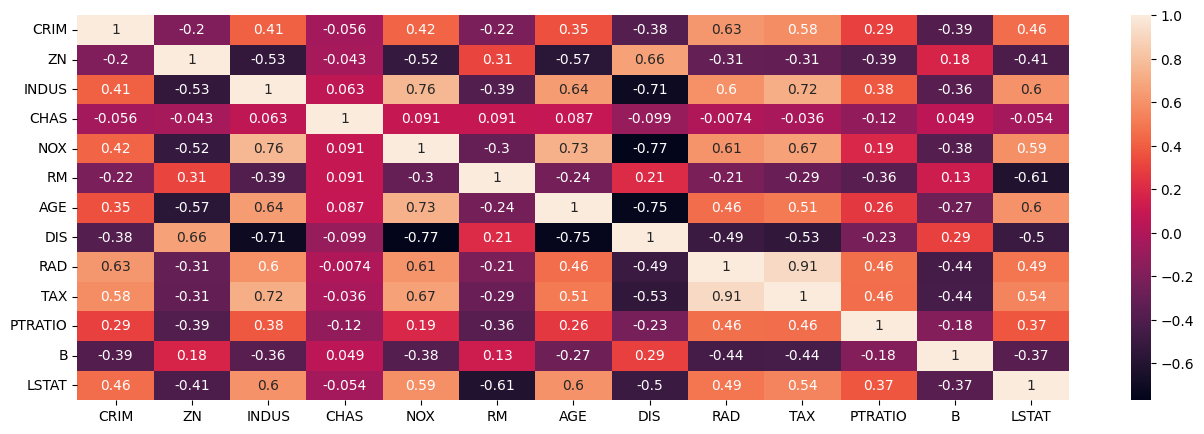

In [7]:
# Transformation der Variablen
transformedDataFrame = transform(dataFrameWithOutTgt)
# Berechnung der Korrelationskoeffizienten
correlation = transformedDataFrame.corr()
# Darstellung der Matrix als Heatmap
plt.figure(figsize = (16,5))
sns.heatmap(correlation, annot=True, xticklabels=correlation.columns, yticklabels=correlation.columns)

**Positive Korrelationen**:
- `TAX` und `RAD` korrelieren mit einem Wert von `0.91`
- `NOX` und `INDUS` korrelieren mit einem Wert von `0.76`
- `AGE` und `NOX` korrelieren mit einem Wert von `0.73`

**Negative Korrelationen**:
- `DIS` und `NOX` korrelieren mit einem Wert von `-0.77`
- `DIS` und `AGE` korrelieren mit einem Wert von `-0.75`
- `DIS` und `INDUS` korrelieren mit einem Wert von `-0.71`

### Aufgabe d)

Berechnung des Korrelationskoeffizienten der Projektionen auf die ersten drei Hauptkomponenten:

In [8]:
# Projektionen der ersten drei Hauptkomponenten
# See https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8
projections = np.dot(U, np.diag(D))
projectionsDataFrame = pd.DataFrame(projections[:,[0,1,2]])
projectionsDataFrame.head()

,0,1,2
0,-2.098297,0.773113,0.342943
1,-1.457252,0.591985,-0.695199
2,-2.074598,0.599639,0.167122
3,-2.611504,-0.006871,-0.100284
4,-2.458185,0.097712,-0.075348


<AxesSubplot: >

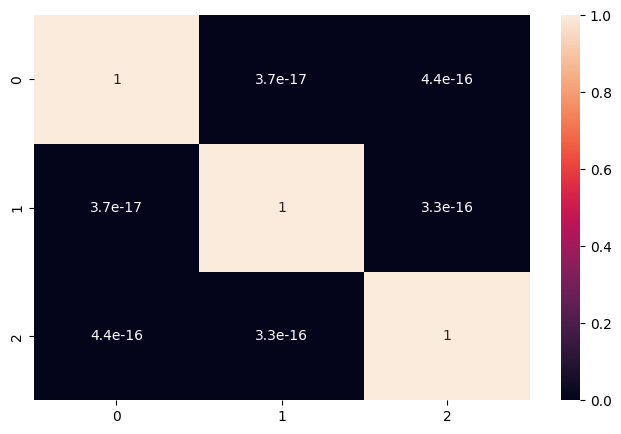

In [9]:
projectionsCorrelation = projectionsDataFrame.corr()
plt.figure(figsize = (8,5))
sns.heatmap(projectionsCorrelation, annot=True, xticklabels=projectionsCorrelation.columns, yticklabels=projectionsCorrelation.columns)

Es existieren keine nennenswerten Korrelationen zwischen den Projektionen.

### Aufgabe e)

Darstellung der ersten beiden neuen Variablen als Scatterplot:

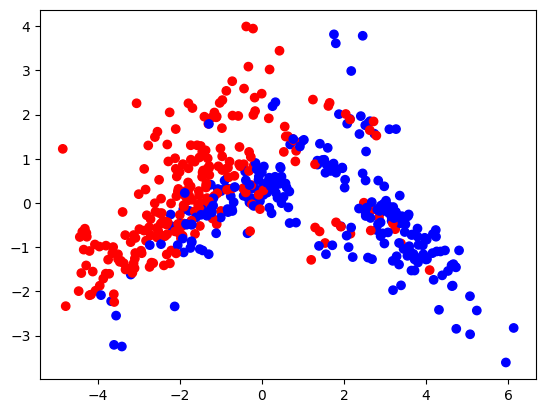

In [10]:
tgtAboveMedian = dataFrame['TGT'] > dataFrame['TGT'].median()
colors = np.where(tgtAboveMedian,'red','blue')
plt.scatter(x=projectionsDataFrame[0], y=projectionsDataFrame[1], color=colors)
plt.show()

Die beiden neuen Variablen eignen sich zur Vorhersage des Hauspreises nur bedingt.